<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/hw_0602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[과제 _ 개념정리]**

**범위 : 파이썬 머신러닝 완벽가이드 ch6. 4 ~ 5 pg. 396 ~ 408**


---

### 04. SVD(singular value decomposition)

### 1) SVD 개요

SVD 역시 PCD와 유사한 행렬 분해 기법을 이용한다. PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.

* 일반적으로 SVD는 mxn 크기의 행렬 A를 다음과 같이 분해하는 것을 의미한다.

 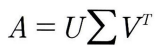

* SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이 벡터이며 모든 특이 벡터는 서로 직교하는 성질을 가진다.
* ∑는 대학행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다. ∑이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다.
* SVD는 A의 차원이 mxn일 때 U의 차원이 mxm, ∑의 차원이 mxn, V의 transpose 차읜이 nxn이 되도록 분해한다.

 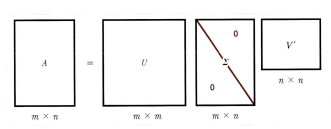

* 하지만, 일반적으로는 다음과 같이 ∑의 비대가인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 ∑에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다.

 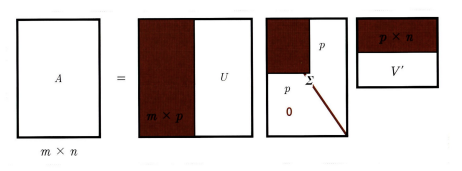

* Truncated SVD는 ∑의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 차원을 더욱 줄인 형태로 분해하는 것이다.
* 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행한다.

### **(1) SVD 예제**

* 넘파이의 SVD 모듈 로딩 및  행렬 생성

In [1]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


* A행렬에 SVD 적용

 SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U행렬, Sigma 행렬, V 전치 행렬을 반환한다.

In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


=> U 행렬이 4x4, Vt 행렬이 4x4 반환됐고, sigma의 경우는 1차원 행렬인 (4,)로 반환됐다.

* 분해된 행렬들이 원본 행렬로 복원되는지 확인

  sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함함 대칭행렬로 변환한 뒤에 내적을 수행해야한다.



In [3]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


* 데이터 세트가 로우 간 의존성이 있을 경우, 어떻게 sigma 값이 변하고 이에 다른 차원 축소가 진행될 수 있는지 확인

In [6]:
# 세번째 로우를 첫번째 로우 + 두번째 로우로 업데이트
# 네번째 로우는 첫번째 로우와 같다고 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* 다시 SVD로 분해

In [7]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


=> 이전과 차원은 같지만 시그마 값 중 2개가 0으로 변했다. 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미이다. 즉 행렬의 랭크가 2이다.

* 다시 원본 행렬로 복원

 이번에는 전체 데이터를 이용하지 않고 sigma의 0에 대응되는 U, sigma, Vt의 데이터를 제외하고 복원한다. 즉,시그마의 경우 앞의 요소 2개만 0이 아니므로, U 행렬 중 선행 두개의 열만 추출하고 Vt의 경우 선행 두개의 행만 추출해 복원한다.

In [8]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* Truncated SVD를 이용해 행렬 분해

  Truncated SVD는 시그마 행렬에 있는 대각 원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다. 이렇게 분해하는 경우 인위적으로 더 작은 차원의 행렬들로 분해하기 때문에 원본 행렬을 정확하게 다시 복구할 수는 없다.

  하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준의 원본 행렬을 근사할 수 있다. (원래 차원의 차수에 가깝게 잘라낼수록 원본 행렬에 가깝게 복원 가능)

* Truncated SVD를 사이파이 모듈을 이용해 테스트 하기

  Truncated SVD는 넘파이가 아닌 사이파이에서만 지원되며, 사이파이는 SVD뿐만 아니라 Truncated SVD도 지원한다.

  일반적으로 사이파이의 SVD는 scipy.linalg.svd를 이용아면 되지만 Truncated SVD는 희소 행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용해야한다.

* 임의의 원본행렬 6x6을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인한 뒤 다시  Truncated SVD로 분해해 분해된 행렬의 차원, 시그마 행렬 내의 특이값, Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터를 비교

In [12]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]


In [13]:
# SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)


분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [14]:
# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)


Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


=> 6X6 행렬을 SVD 분해하면, U, sigma, Vt가 각각 (6,6) (6,) (6,6) 차원이지만, Truncated SVD의 num_components를 4로 설정해 분해하면 (6,4) (4,) (4,6)으로 분해된다. 또한, 원본행렬과 복원된 행렬을 살펴보았을 때 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있다.

### **(2) 사이킷런 TruncatedSVD 클래스를 이용한 반환**

* 사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않는다.

* 사이킷런의 Truncated SVD 클래스는 PCA 클래스와 유사하게 fit(), transform()을 호출해 원본 ㄷ이터를 몇 개의 주요 컴포넌트(즉 Truncated SVD의 k 컴포넌트 수)로 차원을 축소해 변환한다.

* 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성한다.

* 붓꽃 데이터 세트를 Truncated SVD를 이용해 변환하기

In [15]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TruncatedSVD Component 2')

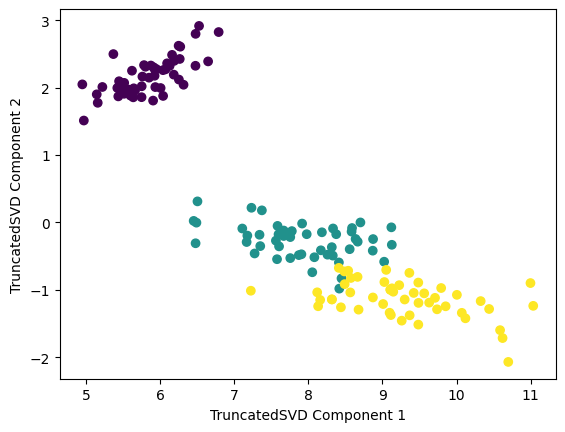

In [21]:
# 산점도 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

=> 왼쪽에 있는 그림이 TruncatedSVD로 변환된 붓꽃 데이터 세트이다. 비교를 위해 오른쪽에 PCA로 변환된 붓꽃 데이터 세트를 가져다 놓았다.TruncatedSVD  변환 역시 PCA와 유사하게 변환 후에 품종별로 어느정도 클러스터링이 가능할 정도로 각 변환 속서응로 뛰어난 고유성을 가지고 있음을 알 수 있다.

=> 사이킷런의 TruncatedSVD와 PCA 클래스 구현을 좀 더 자세히 들어다보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해한다. 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스를 변환해보면 두개가 거의 동일한다.

Text(0.5, 1.0, 'PCA Transformed')

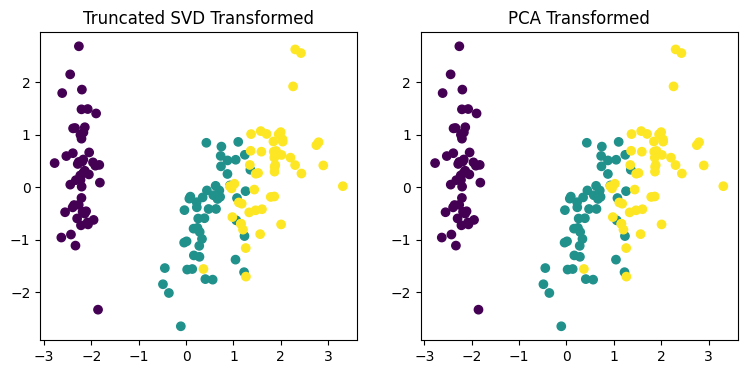

In [22]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

## 05) NMF


NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형이다. 이는 사이킷런에서 NMF 클래스를 이용해 지원된다.

Text(0, 0.5, 'NMF Component 2')

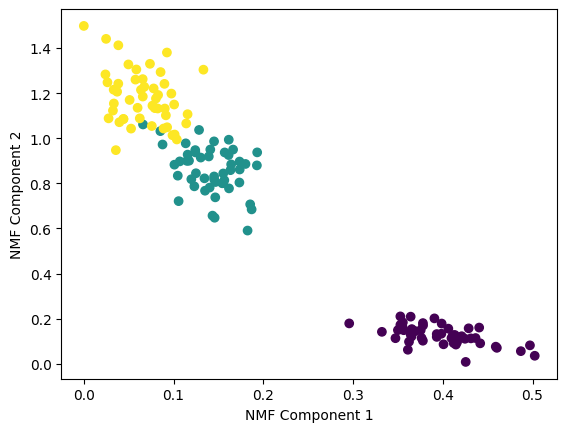

In [23]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')